<a href="https://colab.research.google.com/github/sleevetug/Eloise/blob/main/Copy_of_8_1_Correlation_with_linregress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively and visually
---

This worksheet introduces **scipy** library

A library of functions for interpolating, optimising, linear regression, etc  

---

A dataset will be read into a dataframe, cleaned, wrangled and so prepared for summarising and the telling of stories through visualisations and summaries.

So far we have covered statistical measures over an individual series.  Linear regression reports correlation between the values in two series.

To get the results of a linear regression:  
*  import the `linregress` function from the `scipy.stats` package 
*  run the `linregress` function with the two axes assigning the result to a variable (e.g. `regression`) 

The result of the linregress function is a set of variables:  
*  `slope`, `intercept` - the gradient and y-intercept of the regression line (the line of best fit between the two series) are in `regression.slope` and `regression.intercept`
*  `rvalue` - the correlation coefficient - this indicates how closely the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit
*  `pvalue` - the probability of error if the regression line is extended to predict
*  the standard error is in `regression.stderr` and is the average distance of each data point from the lineof best fit 


Further information [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)


### Exercise 1 - is age closely related to income?
---

Use linear regression to compare the columns 'Age' and 'Income' in the data set 'Income-Data' at this url:  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true  

To do this:
*  import the pandas library  


*  import the **linregress** function from the library **scipy.stats**  (`from scipy.stats import linregress`)  


*  open the Excel file at the url above, using the sheet_name '`county-level`', reading the data into a dataframe called **county_level_df**  


*  create a variable called **x** and assign the '`Age`' column of the `county_level_df` dataframe   


*  create a variable called **y** and assign the '`Income`' column of the `county_level_df` dataframe   


*  create a variable called **regression** and assign the result of running the linregress function with `x`, `y` as its parameters ( `linregress(x,y)` )   


*  display the regression  
(*Expected output:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189*)  


*  display the slope (`regression.slope`)  
(*Expected output: -0.31433084434233205 - this indicates that the line plotting Age against Income slopes downward implying that income reduces with age*)  


*  display the intercept (`regression.intercept`)  
(*Expected output: 72.78388856978748 - this indicates that income level starts at 72.78388856978748 and reduces from there by age*)    


*  display the rvalue (which indicates how closely income follows age and whether it goes up as age goes up or goes down as age goes up 

In [51]:
import pandas as pd
from scipy.stats import linregress

url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df = pd.read_excel(url, sheet_name = 'county-level')

x = county_level_df['Age']
y = county_level_df['Income']

regression = linregress(x,y)
r_squared = regression.rvalue ** 2              #rvalue: find out the regression.rvalue and then rsquare it = regression.rvalue ** 2.
print("Regression: ",regression)
print("Slope: ",regression.slope)
print("Intercept: ",regression.intercept)
print("R Value: ",regression.rvalue)
print("R Squared: ",r_squared)

Regression:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189)
Slope:  -0.31433084434233205
Intercept:  72.78388856978748
R Value:  -0.14787411576068246
R Squared:  0.021866754112003717


### Exercise 2 - Could Population predict Income?  
---

Repeat the steps in exercise 1 to see if there is a clearer correlation between Population and Income.  

Add a statement in the text cell to describe your findings.

**Expected output**:   
0.013558605755058871


Regression:  LinregressResult(slope=0.05737132629483762, intercept=60.95698211316883, rvalue=0.11644142628402862, pvalue=0.6454275157910035, stderr=0.12233846479490115)
Slope:  0.05737132629483762
Intercept:  60.95698211316883
R Value:  0.11644142628402862
R Squared:  0.013558605755058871 



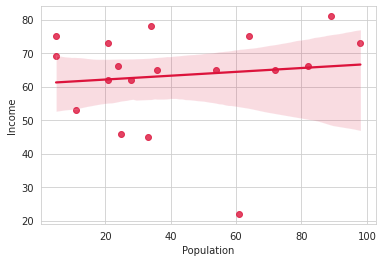


 Model is NOT significant, the pvalue is > 0.05:  0.6454275157910035


In [114]:
import pandas as pd
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt

def find_significance():

    url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
    county_level_df = pd.read_excel(url, sheet_name = 'county-level')

    x = county_level_df['Population']
    y = county_level_df['Income']

    regression = linregress(x,y)
    r_squared = regression.rvalue ** 2
    print("Regression: ",regression)
    print("Slope: ",regression.slope)
    print("Intercept: ",regression.intercept)
    print("R Value: ",regression.rvalue)
    print("R Squared: ",r_squared,"\n")

    x = county_level_df['Population']
    y = county_level_df['Income']

    chart=sns.regplot(x=x, y=y, color="crimson")
    chart.set_xlabel('Population')
    chart.set_ylabel('Income')
    plt.show()

    if regression.pvalue <= 0.05:
      print("Model is significant, the pvalue is < 0.05: ",regression.pvalue)
    else:
      print("\n Model is NOT significant, the pvalue is > 0.05: ",regression.pvalue)

find_significance()

### Exercise 3 - Does Stress predict Wellbeing?
---

Repeat the steps in Exercises 1 & 2 to see if you can find a statistically significant result.

Add a statement in the text cell to describe your findings

* Read the dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* perform linear regression  
* look at r_squared and pvalue to get an idea of how predictive and significant these variables are

* save slope and intercepts in variables for later 

Challenge:  
Write a function that checks the significance of a regression and displays a message indicating the result.

**Test output**:  
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)  
r sqr = 0.4507725540176983  
model is significant, p < .05:  6.084540561441803e-07  

In [110]:
import pandas as pd
from scipy.stats import linregress

def find_significance():

    wellbeing_df = pd.read_csv('https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true')

    x = wellbeing_df['Stress']
    y = wellbeing_df['Wellbeing']

    regression = linregress(x,y)
    print("Regression: ",regression)

    r_squared = regression.rvalue ** 2
    print("R Squared: ",r_squared)

    r_slope = regression.slope
    r_intercept = regression.intercept

    if regression.pvalue <= 0.05:
      print("Model is significant, the pvalue is < 0.05: ",regression.pvalue)
    else:
      print("Model is NOT significant, the pvalue is > 0.05: ",regression.pvalue)

find_significance()

Regression:  LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)
R Squared:  0.4507725540176983
Model is significant, the pvalue is < 0.05:  6.084540561441803e-07


# Create some charts and make some predictions from regressions

1.  Using what you know from completing the Visualisation worksheets (matplotlib and Seaborn), plot the various regression results in a set of charts.
2.  Use the slope and intercept to calculate a prediction for a reasonable value (e.g. predict an income for a given age using the slope and intercept from the regression to calculate income from the formula `age * slope + intercept`

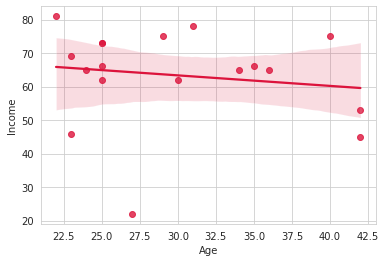

Regression:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189)
Slope:  -0.31433084434233205
Intercept:  72.78388856978748
R Value:  -0.14787411576068246
R Squared:  0.021866754112003717

 Predicting an income for a the max and min age: 
Max Age:  42.0 Income prediction:  59.58199310740953
Min Age:  22.0 Income prediction:  65.86860999425618
Model is NOT significant, the pvalue is > 0.05:  0.5581637648902298


In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

def find_significance():

    url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
    county_level_df = pd.read_excel(url, sheet_name = 'county-level')

    x = county_level_df['Age']
    y = county_level_df['Income']

    chart=sns.regplot(x=x, y=y, color="crimson")
    chart.set_xlabel('Age')
    chart.set_ylabel('Income')
    plt.show()

    regression = linregress(x,y)
    r_squared = regression.rvalue ** 2
    print("Regression: ",regression)
    print("Slope: ",regression.slope)
    print("Intercept: ",regression.intercept)
    print("R Value: ",regression.rvalue)
    print("R Squared: ",r_squared)

    max_prediction = county_level_df['Age'].max() * regression.slope + regression.intercept
    min_prediction = county_level_df['Age'].min() * regression.slope + regression.intercept
    print("\n Predicting an income for a the max and min age: ")
    print("Max Age: ",county_level_df['Age'].max(), "Income prediction: ",max_prediction)
    print("Min Age: ",county_level_df['Age'].min(), "Income prediction: ",min_prediction)

    if regression.pvalue <= 0.05:
      print("Model is significant, the pvalue is < 0.05: ",regression.pvalue)
    else:
      print("Model is NOT significant, the pvalue is > 0.05: ",regression.pvalue)

find_significance()

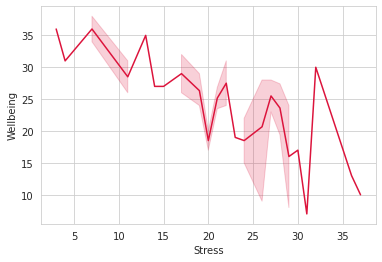

Regression:  LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)
Slope:  -0.6279050248852254
Intercept:  37.713488379900454
R Value:  -0.6713959740851134
R Squared:  0.4507725540176983
Model is significant, the pvalue is < 0.05:  6.084540561441803e-07


In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

def find_significance():

    wellbeing_df = pd.read_csv('https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true')

    x = wellbeing_df['Stress']
    y = wellbeing_df['Wellbeing']

    chart = sns.lineplot(x=x,y=y, color="crimson")
    sns.set_style("whitegrid")

    plt.show()

    regression = linregress(x,y)
    r_squared = regression.rvalue ** 2
    print("Regression: ",regression)
    print("Slope: ",regression.slope)
    print("Intercept: ",regression.intercept)
    print("R Value: ",regression.rvalue)
    print("R Squared: ",r_squared)

    if regression.pvalue <= 0.05:
      print("Model is significant, the pvalue is < 0.05: ",regression.pvalue)
    else:
      print("Model is NOT significant, the pvalue is > 0.05: ",regression.pvalue)

find_significance()

# Further reference on linear regression

[at statisticalsolutions.com](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/)